### Kmeans is widely used in image compression, let's have a look on this type of use of this model

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

import warnings
warnings.filterwarnings("ignore") 

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [40]:
from sklearn.datasets import load_sample_image
china= load_sample_image(image_name='china.jpg')
number=dataset.data

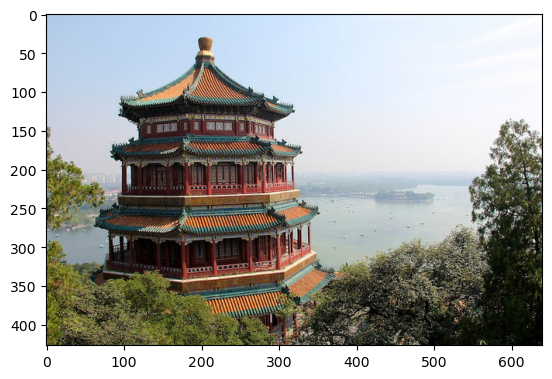

In [19]:
#Show the image
plt.imshow(number)
plt.show()

In [25]:
#Shape of the dataset
print(number.shape)
length, width, RGB = number.shape

(427, 640, 3)


#### We do have this shape because the dataset is split between the height of the pixel, the width of the pixel and its color in RGB

#### We do not normalize our dataset not to loose the contrast of the image so we divide each px by 255 and get a value between 0 and 1


In [41]:
dataset=china/255
reshaped_dataset = dataset.reshape((length * width, RGB))
reshaped_dataset.shape

(273280, 3)

### We will reduce the number of colours to 16. To do this let's create a KMeans algorithm that will take 16 clusters 

In [42]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(reshaped_dataset)

MiniBatchKMeans(n_clusters=16)

#### Steps to reassign the color code of the centroid of the corresponding cluster in a variable called new_colors:

In [43]:
new_colors = kmeans.cluster_centers_[kmeans.predict(reshaped_dataset)]

In [44]:
#Resize new_colors to 3 dimensions
china_recolored = new_colors.reshape(china.shape)

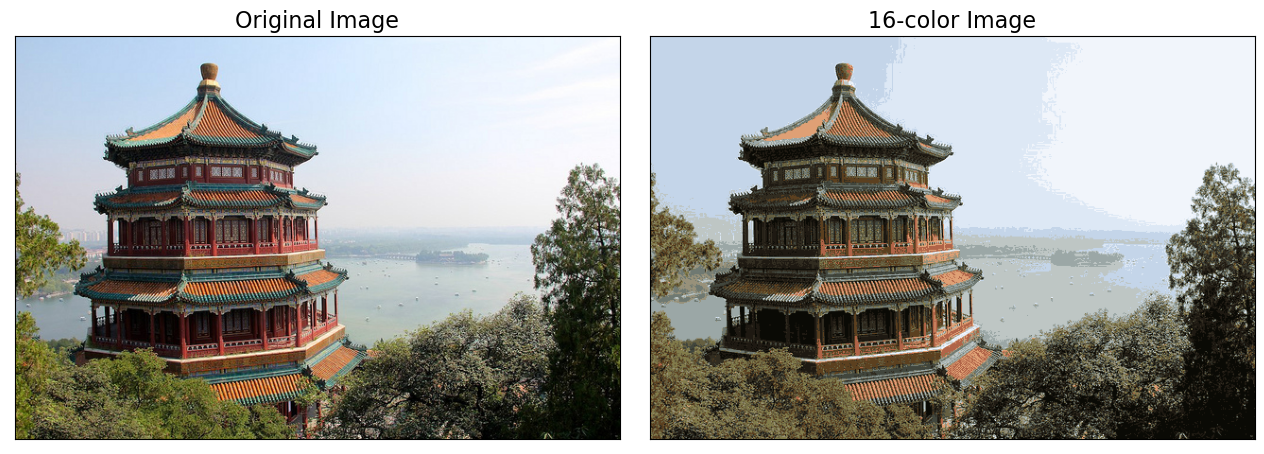

In [45]:
#Visualizing the new image with the variable new_colors
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china);
ax[0].set_title('Original Image', size=16);
ax[1].imshow(china_recolored);
ax[1].set_title('16-color Image', size=16);